In [131]:
import pandas as pd
import custom_funcs as cf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_context('poster')
from sklearn.metrics import mean_squared_error as mse
from model_select import find_best_params, params, shortnames
from isoelectric_point import isoelectric_points
from molecular_weight import molecular_weights
from sklearn.cross_validation import train_test_split, ShuffleSplit
from collections import defaultdict

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Purpose

In this notebook, I intend to setup an automated ensemble learning model selection procedure for any given drug.

In [132]:
# Best models
drugs = dict()
drugs['protease'] = ['FPV', 'ATV', 'IDV', 'LPV', 'NFV', 'SQV', 'TPV', 'DRV',]
drugs['nrt'] = ['3TC', 'ABC', 'AZT', 'D4T', 'DDI', 'TDF',]
drugs['nnrt'] = ['EFV', 'NVP', 'ETR', 'RPV',]

models = ['abr', 'etr', 'bgr', 'gbr', 'rfr']

best_models = dict()


In [133]:
## GREAT! I THINK WE HAVE THE MASTER FUNCTION FOR READING DATA COMPOSED!
drug = 'FPV'
protein = 'protease'
data, feat_cols = cf.get_cleaned_data(protein, drug) 

# Just checking:
cf.test_data_integrity(data)

## Now, let's do data transformations.
data_numeric = cf.to_numeric_rep(data, feat_cols, rep='mw')

# Finally, split the data into a training set, and test set.
X, Y, X_train, X_test, Y_train, Y_test = cf.to_train_test_split(data_numeric, feat_cols, drug, test_size=0.3)
sscv = ShuffleSplit(n=len(X_train), n_iter=3, test_size=0.3)

In [134]:
# data[data[drug] > 2]
''.join(i for i in data.ix[143486][feat_cols].values)

'PQITLWQRPFIPVKVGGQPTEALLDTGADDTIFEGINLPGRWKPKMIGGIGGFVKVRQYDQVPIEICGHTIISTVLVGATPVNVIGRNVMTQIGCTLNF'

In [135]:
mdl_gs = dict()
for mdl in models:
    print(mdl)
    gridsearch = find_best_params(mdl=mdl, cv=sscv, scoring='mean_squared_error', X=X_train, Y=Y_train)
    mdl_gs[mdl] = gridsearch

abr
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:   35.6s
[Parallel(n_jobs=-1)]: Done 292 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.1min finished


etr
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] learning_rate=0.1, n_estimators=50 ..............................
[CV] learning_rate=0.1, n_estimators=50 ..............................
[CV] learning_rate=0.1, n_estimators=50 ..............................
[CV] learning_rate=0.1, n_estimators=100 .............................
[CV] .... learning_rate=0.1, n_estimators=50, score=-0.165033 -   0.2s[CV] .... learning_rate=0.1, n_estimators=50, score=-0.182338 -   0.2s[CV] .... learning_rate=0.1, n_estimators=50, score=-0.186971 -   0.2s[CV] ... learning_rate=0.1, n_estimators=100, score=-0.188868 -   0.4s



[CV] learning_rate=0.1, n_estimators=100 .............................
[CV] learning_rate=0.1, n_estimators=100 .............................
[CV] learning_rate=0.1, n_estimators=150 .............................
[CV] learning_rate=0.1, n_estimators=150 .............................
[CV] ... learning_rate=0.1, n_estimators=100, score=-0.191661 -   0.4s[CV] ... lear

[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    5.0s finished


gbr
Fitting 3 folds for each of 35 candidates, totalling 105 fits
[CV] bootstrap=False, bootstrap_features=False, n_estimators=10 ......
[CV] bootstrap=False, bootstrap_features=False, n_estimators=10 ......
[CV] bootstrap=False, bootstrap_features=False, n_estimators=10 ......
[CV] bootstrap=False, bootstrap_features=False, n_estimators=30 ......
[CV]  bootstrap=False, bootstrap_features=False, n_estimators=10, score=-0.345004 -   0.1s[CV]  bootstrap=False, bootstrap_features=False, n_estimators=10, score=-0.170743 -   0.1s[CV]  bootstrap=False, bootstrap_features=False, n_estimators=10, score=-0.231389 -   0.1s[CV]  bootstrap=False, bootstrap_features=False, n_estimators=30, score=-0.214103 -   0.3s



[CV] bootstrap=False, bootstrap_features=False, n_estimators=30 ......
[CV] bootstrap=False, bootstrap_features=False, n_estimators=30 ......
[CV] bootstrap=False, bootstrap_features=False, n_estimators=50 ......
[CV] bootstrap=False, bootstrap_features=False, n_estimators=50 ......
[C

[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:   12.1s finished


rfr
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] learning_rate=0.02, n_estimators=100 ............................
[CV] learning_rate=0.02, n_estimators=100 ............................
[CV] learning_rate=0.02, n_estimators=100 ............................
[CV] learning_rate=0.02, n_estimators=200 ............................
[CV] .. learning_rate=0.02, n_estimators=100, score=-0.154276 -   0.1s[CV] .. learning_rate=0.02, n_estimators=100, score=-0.183382 -   0.1s[CV] .. learning_rate=0.02, n_estimators=100, score=-0.148858 -   0.1s[CV] .. learning_rate=0.02, n_estimators=200, score=-0.115158 -   0.3s



[CV] learning_rate=0.02, n_estimators=200 ............................
[CV] learning_rate=0.02, n_estimators=200 ............................
[CV] learning_rate=0.02, n_estimators=300 ............................
[CV] learning_rate=0.02, n_estimators=300 ............................
[CV] .. learning_rate=0.02, n_estimators=200, score=-0.131918 -   0.3s[CV] .. learn

[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.5s finished


In [136]:
for mdl, gs in mdl_gs.items():
    print(mdl)
    print(gs.best_score_)

gbr
-0.111084122484
rfr
-0.121143575541
etr
-0.138486887499
abr
-0.163321736283
bgr
-0.11398691274


In [137]:
mdl, best_model = max(mdl_gs.items(), key=lambda x:x[1].best_score_)
best_model.best_estimator_

GradientBoostingRegressor(alpha=0.9, init=None,
             learning_rate=0.099999999999999992, loss='ls', max_depth=3,
             max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=300, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [138]:
# Plot the error as a function of:
# - learning_rate
# - max_depth
# - n_estimators
marginal_scores = dict()
for k in params[mdl].keys():
    marginal_scores[k] = defaultdict(list)

    
for result in best_model.grid_scores_:
    for k, v in result[0].items():
        for score in result[2]:
            marginal_scores[k]['scores'].append(score)
            marginal_scores[k]['values'].append(v)

In [139]:
marginal_scores.keys()

dict_keys(['learning_rate', 'n_estimators'])

learning_rate
n_estimators


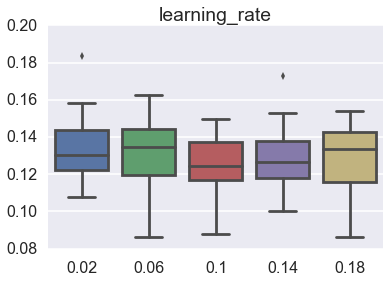

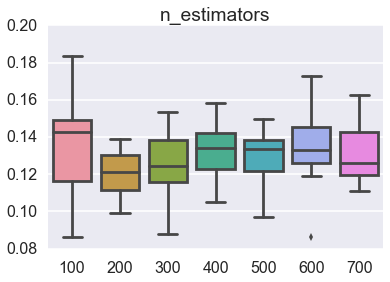

In [140]:
for i, key in enumerate(marginal_scores.keys()):
    print(key)
    fig = plt.figure(i)
    sns.boxplot(x=marginal_scores[key]['values'], y=-np.array(marginal_scores[key]['scores']))
    plt.title(key)

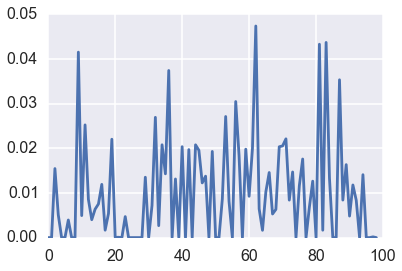

In [141]:
plt.plot(best_model.best_estimator_.feature_importances_)

In [142]:
best_model.best_params_

{'learning_rate': 0.099999999999999992, 'n_estimators': 300}

In [143]:
Y_test[Y_test > 2.5]

SeqID
143486    2.60206
147550    2.60206
98603     2.60206
86834     2.60206
113060    2.60206
113050    2.60206
Name: FPV, dtype: float64

0.10691729997561683

/Users/ericmjl/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


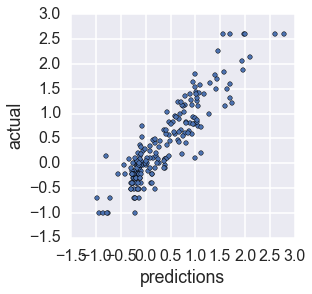

In [144]:
preds = best_model.best_estimator_.predict(X_test)
df = pd.DataFrame([preds, Y_test]).T
df.columns = ['predictions', 'actual']
df.plot(x='predictions', y='actual', kind='scatter', figsize=(4,4))
mse(preds, Y_test)

In [145]:
from sklearn.externals import joblib
joblib.dump(best_model.best_estimator_, 'models/{protein}-{drug}.pkl'.format(protein=protein, drug=drug))

['models/protease-FPV.pkl',
 'models/protease-FPV.pkl_01.npy',
 'models/protease-FPV.pkl_02.npy',
 'models/protease-FPV.pkl_03.npy',
 'models/protease-FPV.pkl_04.npy',
 'models/protease-FPV.pkl_05.npy',
 'models/protease-FPV.pkl_06.npy',
 'models/protease-FPV.pkl_07.npy',
 'models/protease-FPV.pkl_08.npy',
 'models/protease-FPV.pkl_09.npy',
 'models/protease-FPV.pkl_10.npy',
 'models/protease-FPV.pkl_11.npy',
 'models/protease-FPV.pkl_12.npy',
 'models/protease-FPV.pkl_13.npy',
 'models/protease-FPV.pkl_14.npy',
 'models/protease-FPV.pkl_15.npy',
 'models/protease-FPV.pkl_16.npy',
 'models/protease-FPV.pkl_17.npy',
 'models/protease-FPV.pkl_18.npy',
 'models/protease-FPV.pkl_19.npy',
 'models/protease-FPV.pkl_20.npy',
 'models/protease-FPV.pkl_21.npy',
 'models/protease-FPV.pkl_22.npy',
 'models/protease-FPV.pkl_23.npy',
 'models/protease-FPV.pkl_24.npy',
 'models/protease-FPV.pkl_25.npy',
 'models/protease-FPV.pkl_26.npy',
 'models/protease-FPV.pkl_27.npy',
 'models/protease-FPV.pkl_2

In [146]:
mdl = joblib.load('models/{protein}-{drug}.pkl'.format(protein=protein, drug=drug))

In [147]:
new_sequence = 'PQITLWQRPFIPVKVGGQPTEALLDTGADDTIFEGINLPGRWKPKMIGGIGGFVKVRQYDQVPIEICGHTIISTVLVGATPVNVIGRNVMTQIGCTLNF'
old_sequence = 'PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMNLPGRWKPKMIGGIGGFIKVRQYDQILIEICGHKAIGTVLVGPTPVNIIGRNLLTQIGCTLNF'
import sequence_transformer as st

In [148]:
new_seq = st.to_numeric_rep(new_sequence, rep='mw')
new_vec = st.standardize_sequence(new_seq)

In [149]:
mdl.predict(new_vec)

/Users/ericmjl/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 1.39908646])